<a href="https://colab.research.google.com/github/srvqgithub/MIS515-Projects/blob/main/MIS_515_Project_3_Classification_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

In [ ]:
%autosave 60

Autosaving every 60 seconds


# **DATA CLEANING:**

Dataset before cleaning:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Read the CSV file
df = pd.read_csv('cancer patient data sets.csv')


df

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                       4             3                     2  ...        3   
1                       3             4                     2  ...        1   
2                       5             5                     4  ...        8   
3                       7             6                     7  ...        4   
4                       7             7                     6  ...        3   
..                    ...           ...                   ...  ...      ...   
995                     7             7                     6  ...        5   
996                     7             7                     6  ...        9   
997                     5             5                     4  ...        8   
998                     7             7                     6  ...        3   
999                     5             5                     4  ...        8   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0              4                    2         2                      3   
1              3                    7         8                      6   
2              7                    9         2                      1   
3              2                    3         1                      4   
4              2                    4         1                      4   
..           ...                  ...       ...                    ...   
995            3                    2         7                      8   
996            6                    5         7                      2   
997            7                    9         2                      1   
998            2                    4         1                      4   
999            7                    9         2                      1   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                           1              2          3        4     Low  
1                           2              1          7        2  Medium  
2                           4              6          7        2    High  
3                           5              6          7        5    High  
4                           2              4          2        3    High  
..                        ...            ...        ...      ...     ...  
995                         2              4          5        3    High  
996                         4              3          1        4    High  
997                         4              6          7        2    High  
998                         2              4          2        3    High  
999                         4              6          7        2    High  

[1000 rows x 26 columns]

Dataset after cleaning:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Read the CSV file
df = pd.read_csv('cancer patient data sets.csv')

# Remove duplicate rows
df = df.drop_duplicates()

# Remove rows with empty entries
df = df.dropna()

# Remove 'Clubbing of Finger Nails', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath', 'Wheezing', 'Fatigue', 'Frequent Cold', 'Dry Cough', 'Chest Pain', 'Swallowing Difficulty
df = df.drop(columns=['Clubbing of Finger Nails', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath', 'Wheezing', 'Fatigue', 'Frequent Cold', 'Dry Cough', 'Chest Pain', 'Swallowing Difficulty'])

df

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                       4             3                     2              2   
1                       3             4                     2              2   
2                       5             5                     4              6   
3                       7             6                     7              7   
4                       7             7                     6              7   
..                    ...           ...                   ...            ...   
995                     7             7                     6              7   
996                     7             7                     6              7   
997                     5             5                     4              6   
998                     7             7                     6              7   
999                     5             5                     4              6   

     Obesity  Smoking  Passive Smoker  Weight Loss  Snoring   Level  
0          4        3               2            4        4     Low  
1          2        2               4            3        2  Medium  
2          7        2               3            7        2    High  
3          7        7               7            2        5    High  
4          7        8               7            2        3    High  
..       ...      ...             ...          ...      ...     ...  
995        7        7               8            3        3    High  
996        7        7               8            6        4    High  
997        7        2               3            7        2    High  
998        7        8               7            2        3    High  
999        7        2               3            7        2    High  

[1000 rows x 17 columns]

In [ ]:
print(df.head())

   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   Obesity  Smoking  Passive Smoker  Weight Loss  Snoring   Le

In [ ]:
# Replace entries in the 'Level' column with numerical values
df['Level'] = df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})


print(df.sample(n=5))

     index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
884    884       P895   44       1              6            7             7   
75      75       P166   35       1              2            1             5   
959    959       P962   62       1              6            8             7   
66      66       P158   45       2              3            2             4   
970    970       P972   48       2              6            8             7   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
884                     7             7                     6  ...        5   
75                      3             2                     3  ...        6   
959                     7             7                     6  ...        2   
66                      2             3                     2  ...        4   
970                     7             7                     6  ...        2   

     Weight Loss  Shortness of Breath  Wheez

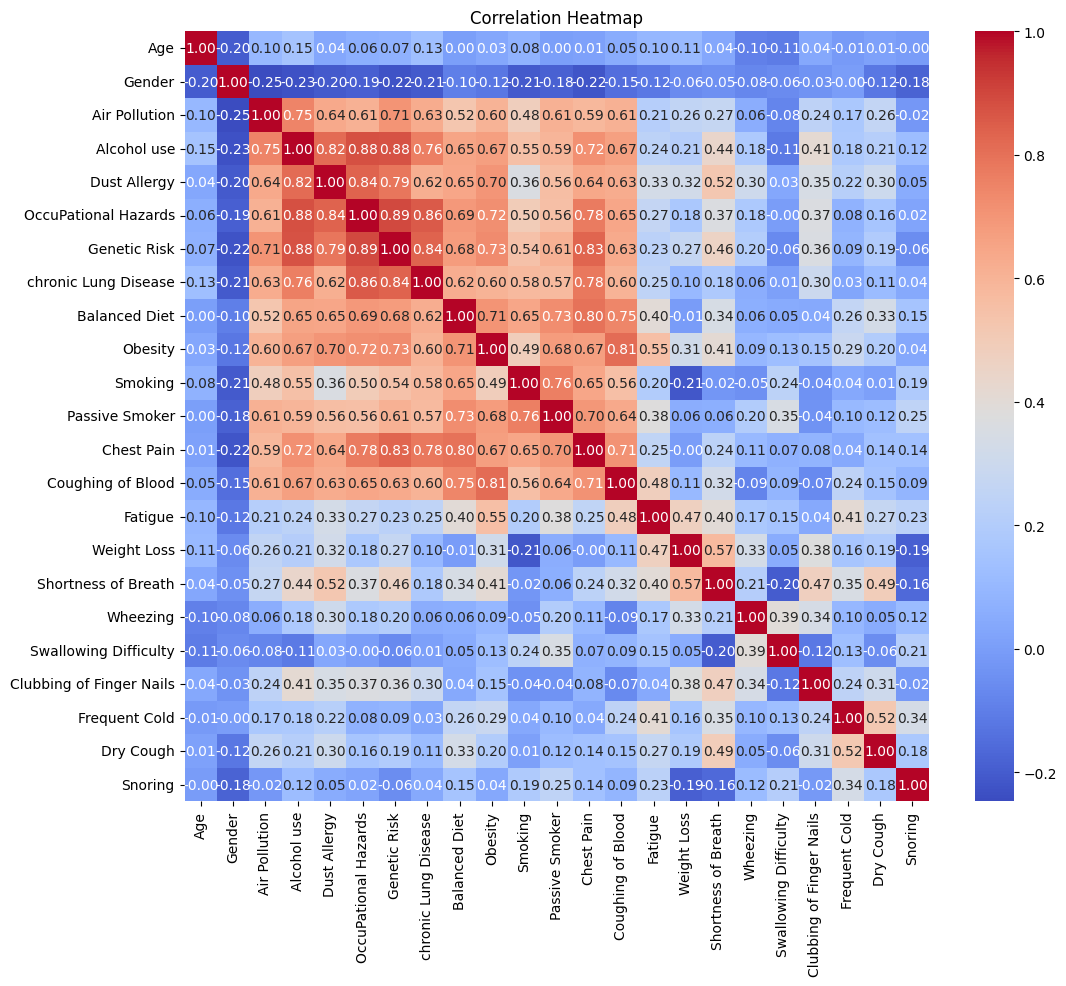

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('cancer patient data sets.csv')

# Remove specified features
features_to_exclude = ['Patient Id', 'Clubbing of Finger Nails', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath',
                       'Wheezing', 'Fatigue', 'Frequent Cold', 'Dry Cough', 'Chest Pain', 'Swallowing Difficulty']
df_filtered = df.drop(columns=features_to_exclude)

# Define features (X) and target variable (y)
X = df.drop(columns=['index', 'Patient Id', 'Level'])  # Features
y = df['Level']  # Target variable

# Calculate correlation matrix
corr_matrix = X.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


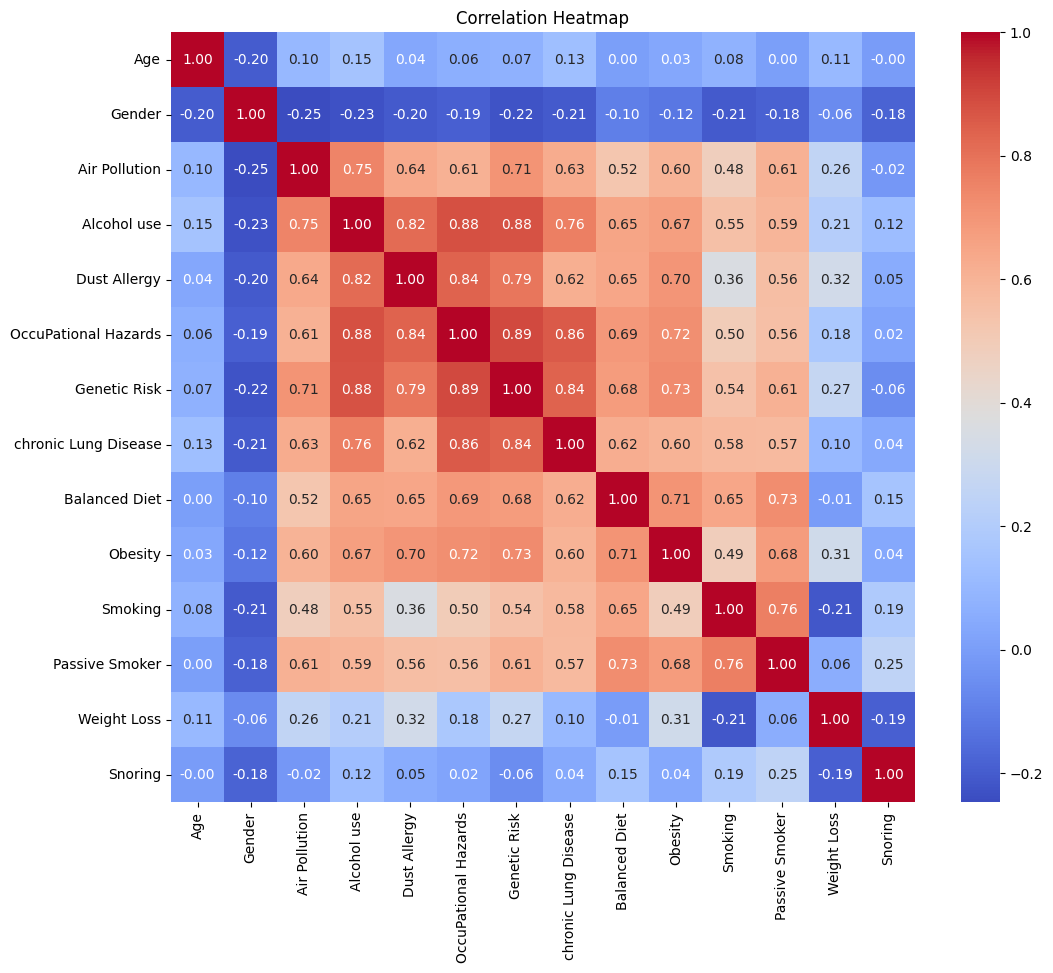

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('cancer patient data sets.csv')

# Remove specified features
features_to_exclude = ['Patient Id', 'Clubbing of Finger Nails', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath',
                       'Wheezing', 'Fatigue', 'Frequent Cold', 'Dry Cough', 'Chest Pain', 'Swallowing Difficulty', 'index']
df_filtered = df.drop(columns=features_to_exclude)

# Select only numeric columns
numeric_columns = df_filtered.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
corr_matrix = df_filtered[numeric_columns].corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**FINDING THE BEST PREDICTION MODEL FOR CLASSIFICATION**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.82      0.88        84
           2       0.86      0.97      0.91        97
           3       1.00      1.00      1.00       119

    accuracy                           0.94       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.94      0.94       300



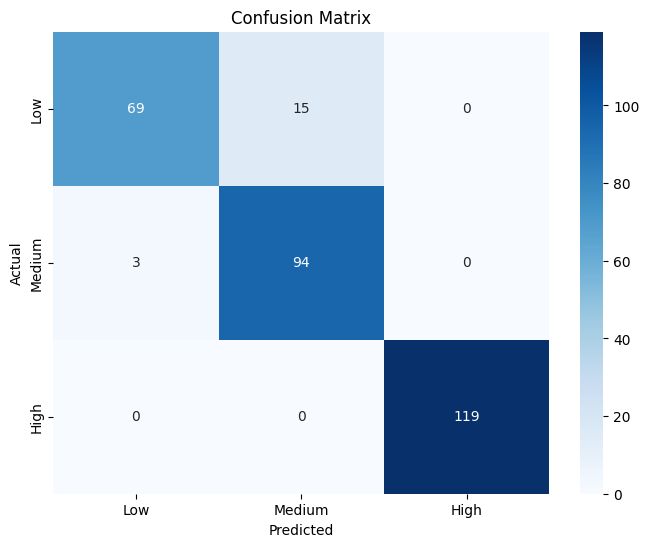

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('cancer patient data sets.csv')
df['Level'] = df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Define features (X) and target variable (y), excluding specified features
features_to_exclude = ['Patient Id', 'Clubbing of Finger Nails', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath',
                       'Wheezing', 'Fatigue', 'Frequent Cold', 'Dry Cough', 'Chest Pain', 'Swallowing Difficulty', 'index']
X = df.drop(columns=['Level'] + features_to_exclude)  # Features
y = df['Level']  # Target variable

# Map string labels to numerical values for 'Level' column
df['Level'] = df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        97
           3       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



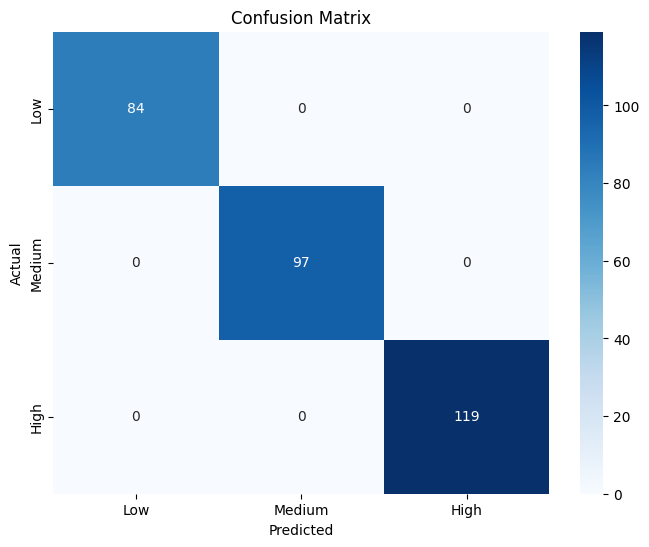

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('cancer patient data sets.csv')
df['Level'] = df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Define features (X) and target variable (y), excluding specified features
features_to_exclude = ['Patient Id', 'Clubbing of Finger Nails', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath',
                       'Wheezing', 'Fatigue', 'Frequent Cold', 'Dry Cough', 'Chest Pain', 'Swallowing Difficulty', 'index']
X = df.drop(columns=['Level'] + features_to_exclude)  # Features
y = df['Level']  # Target variable

# Map string labels to numerical values for 'Level' column
df['Level'] = df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 0.9966666666666667

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.99      0.99        84
           2       0.99      1.00      0.99        97
           3       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



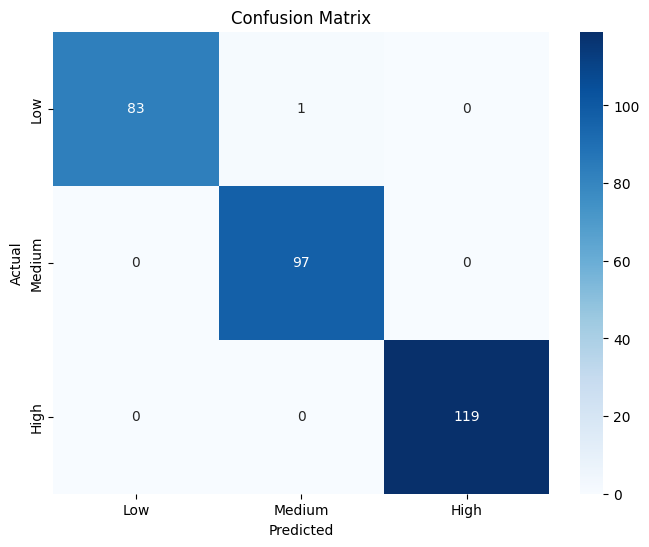

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('cancer patient data sets.csv')
df['Level'] = df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Define features (X) and target variable (y), excluding specified features
features_to_exclude = ['Patient Id', 'Clubbing of Finger Nails', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath',
                       'Wheezing', 'Fatigue', 'Frequent Cold', 'Dry Cough', 'Chest Pain', 'Swallowing Difficulty', 'index']
X = df.drop(columns=['Level'] + features_to_exclude)  # Features
y = df['Level']  # Target variable

# Map string labels to numerical values for 'Level' column
df['Level'] = df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the KNN classifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 0.7166666666666667

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.83      0.78        84
           2       0.56      0.58      0.57        97
           3       0.85      0.75      0.79       119

    accuracy                           0.72       300
   macro avg       0.71      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



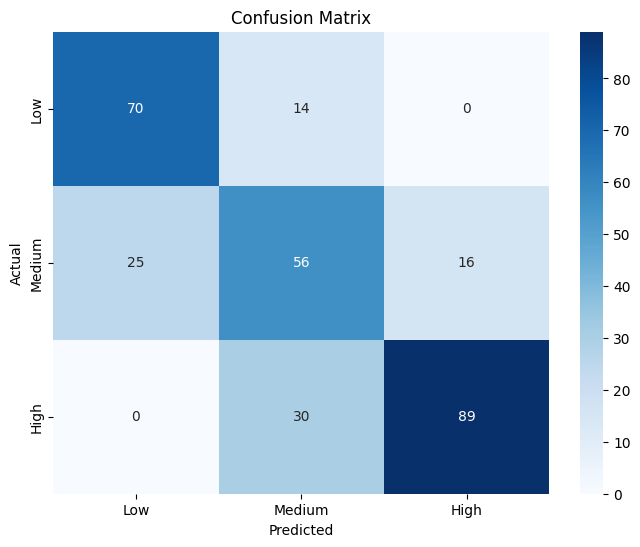

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('cancer patient data sets.csv')
df['Level'] = df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Define features (X) and target variable (y), excluding specified features
features_to_exclude = ['Patient Id', 'Clubbing of Finger Nails', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath',
                       'Wheezing', 'Fatigue', 'Frequent Cold', 'Dry Cough', 'Chest Pain', 'Swallowing Difficulty', 'index']
X = df.drop(columns=['Level'] + features_to_exclude)  # Features
y = df['Level']  # Target variable

# Map string labels to numerical values for 'Level' column
df['Level'] = df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Through multiple tests we came to the conclusion that Random Forest Classifier is the best method to use for classification for our dataset.**

**We start testing different features of the dataset to find the one with the highest accuracy of predicting the risk for lung cancer.**

Accuracy: 0.6433333333333333

Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.88      0.69        84
           2       0.00      0.00      0.00        97
           3       0.70      1.00      0.82       119

    accuracy                           0.64       300
   macro avg       0.42      0.63      0.51       300
weighted avg       0.44      0.64      0.52       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


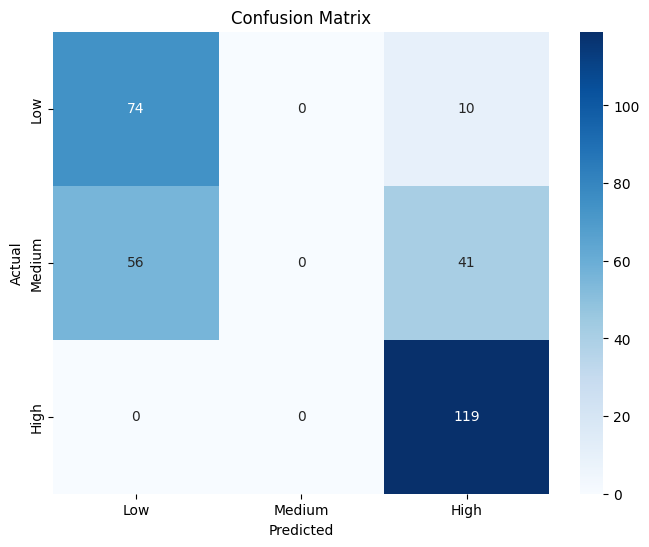

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('cancer patient data sets.csv')

# Drop specified features
features_to_exclude = ['Patient Id', 'Clubbing of Finger Nails', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath',
                       'Wheezing', 'Fatigue', 'Frequent Cold', 'Dry Cough', 'Chest Pain', 'Swallowing Difficulty', 'index']
df = df.drop(columns=features_to_exclude)

# Drop rows with missing values in 'Genetic Risk' or 'Level'
df = df.dropna(subset=['Genetic Risk', 'Level'])

# Map string labels to numerical values for 'Level' column
df['Level'] = df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Define features (X) and target variable (y)
X = df[['Genetic Risk']]  # Feature: Genetic Risk
y = df['Level']  # Target variable: Level

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 0.6333333333333333

Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.13      0.22        84
           2       0.49      0.98      0.66        97
           3       0.94      0.71      0.81       119

    accuracy                           0.63       300
   macro avg       0.68      0.61      0.56       300
weighted avg       0.70      0.63      0.59       300



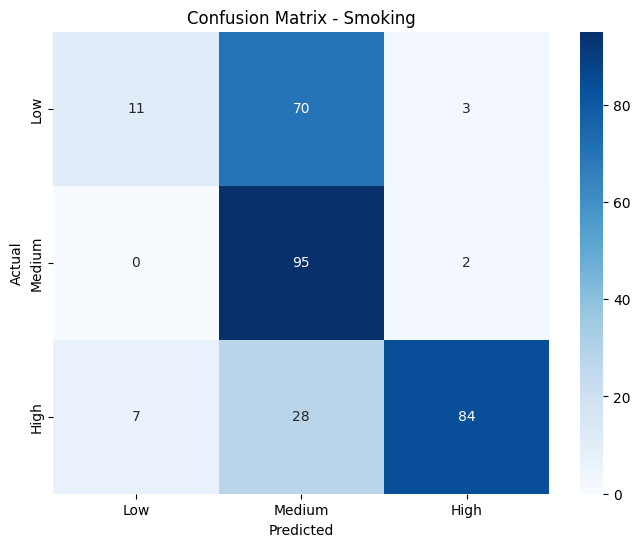

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('cancer patient data sets.csv')

# Drop specified features
features_to_exclude = ['Patient Id', 'Clubbing of Finger Nails', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath',
                       'Wheezing', 'Fatigue', 'Frequent Cold', 'Dry Cough', 'Chest Pain', 'Swallowing Difficulty', 'index']
df = df.drop(columns=features_to_exclude)

# Drop rows with missing values in 'Genetic Risk' or 'Level'
df = df.dropna(subset=['Smoking', 'Level'])

# Map string labels to numerical values for 'Level' column
df['Level'] = df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Define features (X) and target variable (y)
X = df[['Smoking']]  # Feature: Genetic Risk
y = df['Level']  # Target variable: Level

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - Smoking')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.65      0.60        84
           2       0.62      0.34      0.44        97
           3       0.76      0.95      0.84       119

    accuracy                           0.67       300
   macro avg       0.65      0.65      0.63       300
weighted avg       0.66      0.67      0.65       300



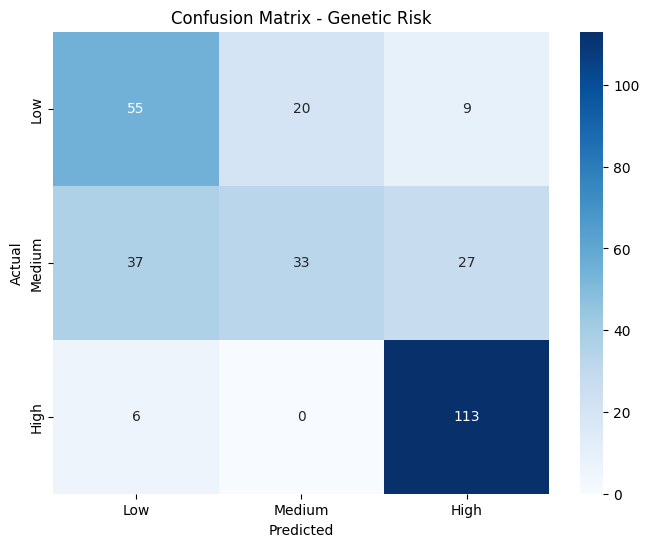

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('cancer patient data sets.csv')

# Drop specified features
features_to_exclude = ['Patient Id', 'Clubbing of Finger Nails', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath',
                       'Wheezing', 'Fatigue', 'Frequent Cold', 'Dry Cough', 'Chest Pain', 'Swallowing Difficulty', 'index']
df = df.drop(columns=features_to_exclude)

# Drop rows with missing values in 'Genetic Risk' or 'Level'
df = df.dropna(subset=['Air Pollution', 'Level'])

# Map string labels to numerical values for 'Level' column
df['Level'] = df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Define features (X) and target variable (y)
X = df[['Air Pollution']]  # Feature: Genetic Risk
y = df['Level']  # Target variable: Level

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - Genetic Risk')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 0.52

Classification Report:
              precision    recall  f1-score   support

           1       0.41      0.35      0.37        84
           2       0.49      0.76      0.60        97
           3       0.68      0.45      0.54       119

    accuracy                           0.52       300
   macro avg       0.53      0.52      0.50       300
weighted avg       0.54      0.52      0.51       300



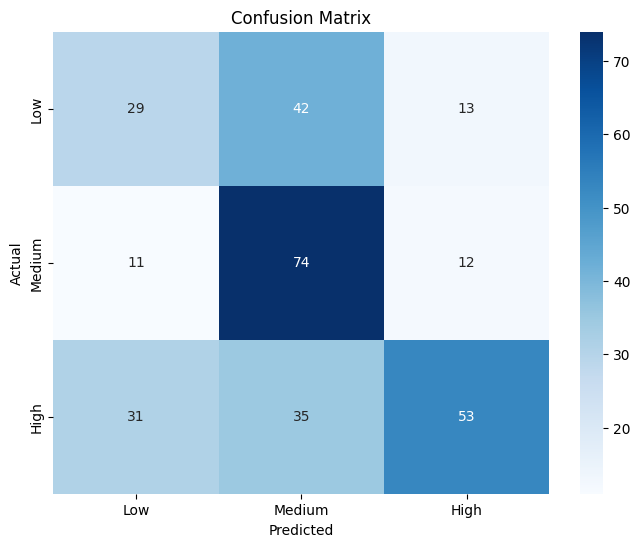

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('cancer patient data sets.csv')

# Drop specified features
features_to_exclude = ['Patient Id', 'Clubbing of Finger Nails', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath',
                       'Wheezing', 'Fatigue', 'Frequent Cold', 'Dry Cough', 'Chest Pain', 'Swallowing Difficulty', 'index']
df = df.drop(columns=features_to_exclude)

# Drop rows with missing values in 'Genetic Risk' or 'Level'
df = df.dropna(subset=['Age', 'Level'])

# Map string labels to numerical values for 'Level' column
df['Level'] = df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Define features (X) and target variable (y)
X = df[['Age']]  # Feature: Genetic Risk
y = df['Level']  # Target variable: Level

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 0.6733333333333333

Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.88      0.71        84
           2       0.88      0.15      0.26        97
           3       0.71      0.95      0.81       119

    accuracy                           0.67       300
   macro avg       0.73      0.66      0.60       300
weighted avg       0.73      0.67      0.61       300



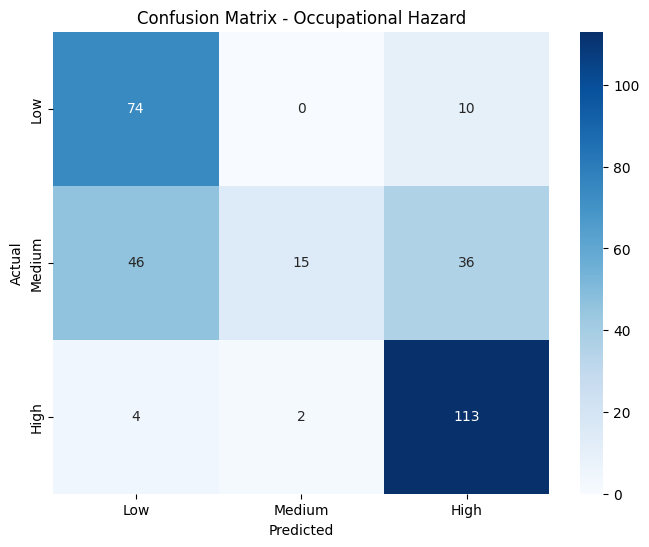

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('cancer patient data sets.csv')

# Drop specified features
features_to_exclude = ['Patient Id', 'Clubbing of Finger Nails', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath',
                       'Wheezing', 'Fatigue', 'Frequent Cold', 'Dry Cough', 'Chest Pain', 'Swallowing Difficulty', 'index']
df = df.drop(columns=features_to_exclude)

# Drop rows with missing values in 'Genetic Risk' or 'Level'
df = df.dropna(subset=['OccuPational Hazards', 'Level'])

# Map string labels to numerical values for 'Level' column
df['Level'] = df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Define features (X) and target variable (y)
X = df[['OccuPational Hazards']]  # Feature: Genetic Risk
y = df['Level']  # Target variable: Level

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - Occupational Hazard')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 0.7033333333333334

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.88      0.80        84
           2       0.71      0.25      0.37        97
           3       0.69      0.95      0.80       119

    accuracy                           0.70       300
   macro avg       0.71      0.69      0.65       300
weighted avg       0.70      0.70      0.66       300



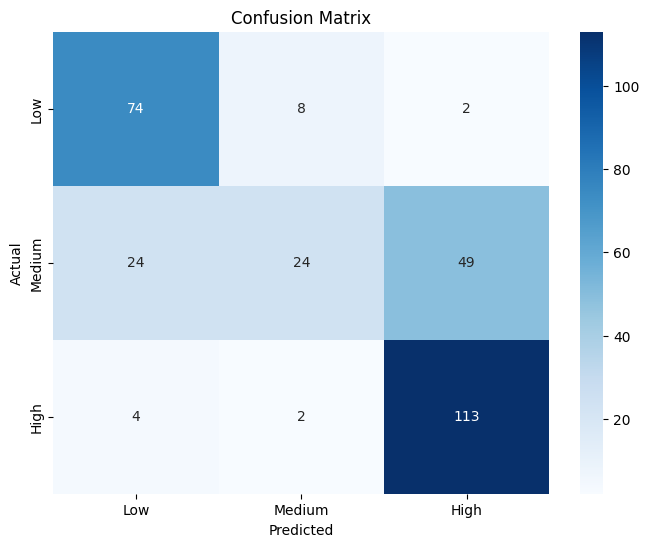

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('cancer patient data sets.csv')

# Drop specified features
features_to_exclude = ['Patient Id', 'Clubbing of Finger Nails', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath',
                       'Wheezing', 'Fatigue', 'Frequent Cold', 'Dry Cough', 'Chest Pain', 'Swallowing Difficulty', 'index']
df = df.drop(columns=features_to_exclude)

# Drop rows with missing values in 'Genetic Risk' or 'Level'
df = df.dropna(subset=['Dust Allergy', 'Level'])

# Map string labels to numerical values for 'Level' column
df['Level'] = df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Define features (X) and target variable (y)
X = df[['Dust Allergy']]  # Feature: Genetic Risk
y = df['Level']  # Target variable: Level

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 0.5566666666666666

Classification Report:
              precision    recall  f1-score   support

        High       0.67      0.76      0.72       119
         Low       0.57      0.62      0.59        84
      Medium       0.32      0.25      0.28        97

    accuracy                           0.56       300
   macro avg       0.52      0.54      0.53       300
weighted avg       0.53      0.56      0.54       300


Confusion Matrix:
[[91  4 24]
 [ 6 52 26]
 [38 35 24]]


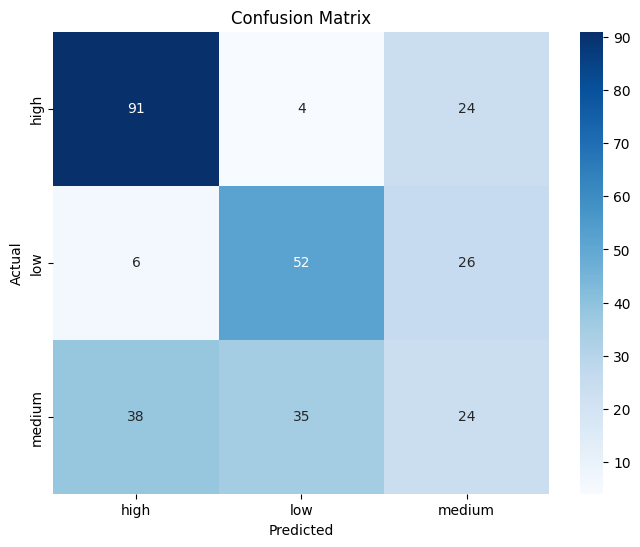

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('cancer patient data sets.csv')

# Drop rows with missing values in 'Genetic Risk' or 'Level'
df = df.dropna(subset=['OccuPational Hazard', 'Level'])

# Map string labels to numerical values for 'Level' column
df['Level'] = df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Define features (X) and target variable (y)
X = df[['OccuPational Hazard']]  # Feature: Occupational Hazard
y = df['Level']  # Target variable: Level

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**To be more efficient we constructed a code that iterates through each feature until it finds the feature with the highest accuracy for predictive classification. Here we discover that for our dataset it is Obesity. We also found in our data analysis that Gender is the least accurate feature.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('cancer patient data sets.csv')

# Drop rows with missing values in 'Level'
df = df.dropna(subset=['Level'])

# Map string labels to numerical values for 'Level' column
label_encoder = LabelEncoder()
df['Level'] = label_encoder.fit_transform(df['Level'])

# Define features to exclude
features_to_exclude = ['Patient Id', 'Clubbing of Finger Nails', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath',
                       'Wheezing', 'Fatigue', 'Frequent Cold', 'Dry Cough', 'Chest Pain', 'Swallowing Difficulty', 'index']

# Exclude specified features from X
X = df.drop(columns=['Level'] + features_to_exclude)

# Target variable
y = df['Level']

# Initialize variables to store the best accuracy and corresponding feature
best_accuracy = 0
best_feature = None

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Iterate through each feature
for feature in X.columns:
    # Train the model using only the current feature
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_feature, y_train)

    # Make predictions
    y_pred = model.predict(X_test_feature)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Update the best accuracy and corresponding feature if applicable
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_feature = feature

# Print the feature with the highest accuracy
print("Best Feature:", best_feature)
print("Best Accuracy:", best_accuracy)


Best Feature: Obesity
Best Accuracy: 0.7933333333333333


Accuracy: 0.7933333333333333

Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.64      0.72        84
           2       0.65      0.78      0.71        97
           3       0.92      0.91      0.91       119

    accuracy                           0.79       300
   macro avg       0.80      0.78      0.78       300
weighted avg       0.81      0.79      0.79       300



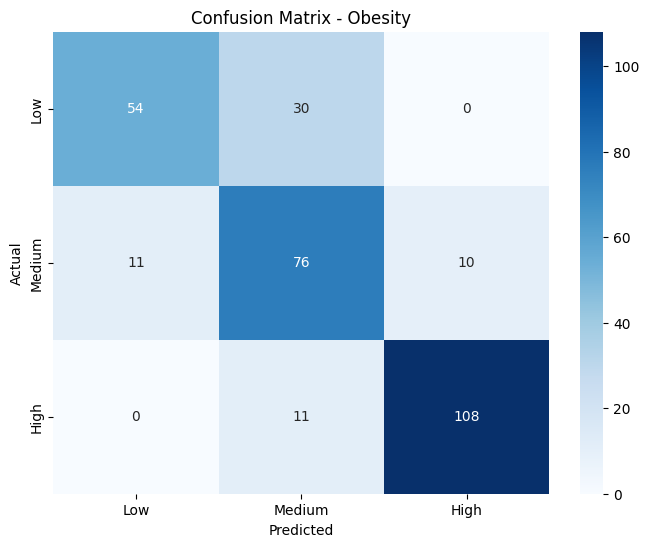

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('cancer patient data sets.csv')

# Drop specified features
features_to_exclude = ['Patient Id', 'Clubbing of Finger Nails', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath',
                       'Wheezing', 'Fatigue', 'Frequent Cold', 'Dry Cough', 'Chest Pain', 'Swallowing Difficulty', 'index']
df = df.drop(columns=features_to_exclude)

# Drop rows with missing values in 'Genetic Risk' or 'Level'
df = df.dropna(subset=['Obesity', 'Level'])

# Map string labels to numerical values for 'Level' column
df['Level'] = df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Define features (X) and target variable (y)
X = df[['Obesity']]  # Feature: Genetic Risk
y = df['Level']  # Target variable: Level

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - Obesity')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('cancer patient data sets.csv')

# Drop rows with missing values in 'Level'
df = df.dropna(subset=['Level'])

# Map string labels to numerical values for 'Level' column
label_encoder = LabelEncoder()
df['Level'] = label_encoder.fit_transform(df['Level'])

# Define features to exclude
features_to_exclude = ['Patient Id', 'Clubbing of Finger Nails', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath',
                       'Wheezing', 'Fatigue', 'Frequent Cold', 'Dry Cough', 'Chest Pain', 'Swallowing Difficulty', 'index']

# Exclude specified features from X
X = df.drop(columns=['Level'] + features_to_exclude)

# Target variable
y = df['Level']

# Initialize variables to store the worst accuracy and corresponding feature
worst_accuracy = 1  # Set to a high value initially
worst_feature = None

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Iterate through each feature
for feature in X.columns:
    # Train the model using only the current feature
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_feature, y_train)

    # Make predictions
    y_pred = model.predict(X_test_feature)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Update the worst accuracy and corresponding feature if applicable
    if accuracy < worst_accuracy:
        worst_accuracy = accuracy
        worst_feature = feature

# Print the feature with the lowest accuracy
print("Worst Feature:", worst_feature)
print("Worst Accuracy:", worst_accuracy)


Worst Feature: Gender
Worst Accuracy: 0.44333333333333336


Accuracy: 0.4266666666666667

Classification Report:
              precision    recall  f1-score   support

           1       0.40      0.55      0.46        91
           2       0.00      0.00      0.00       100
           3       0.45      0.72      0.55       109

    accuracy                           0.43       300
   macro avg       0.28      0.42      0.34       300
weighted avg       0.28      0.43      0.34       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


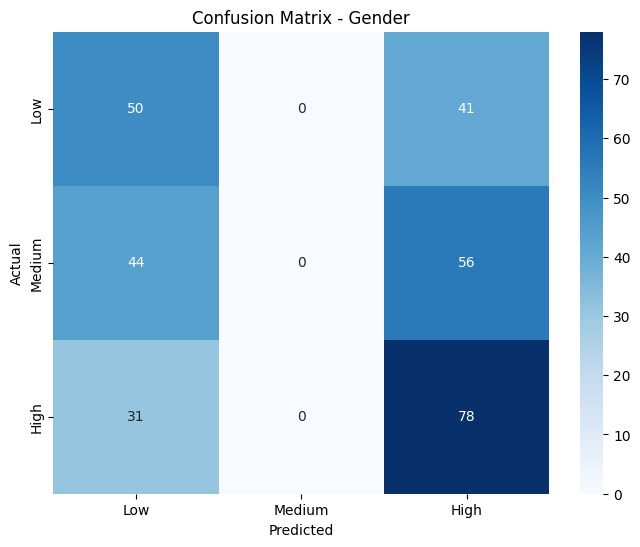

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('cancer patient data sets.csv')

# Drop specified features
features_to_exclude = ['Patient Id', 'Clubbing of Finger Nails', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath',
                       'Wheezing', 'Fatigue', 'Frequent Cold', 'Dry Cough', 'Chest Pain', 'Swallowing Difficulty', 'index']
df = df.drop(columns=features_to_exclude)

# Drop rows with missing values in 'Genetic Risk' or 'Level'
df = df.dropna(subset=['Gender', 'Level'])

# Map string labels to numerical values for 'Level' column
df['Level'] = df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Define features (X) and target variable (y)
X = df[['Gender']]  # Feature: Genetic Risk
y = df['Level']  # Target variable: Level

# Stratified sampling to ensure proportional representation of classes in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division='warn'))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - Gender')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**After finding the best and worst features for the data set, we used those plus the features we selected to create a model for classification, below are our results:**

Accuracy: 0.9866666666666667

Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.99      0.98        91
           2       0.99      0.97      0.98       100
           3       1.00      1.00      1.00       109

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



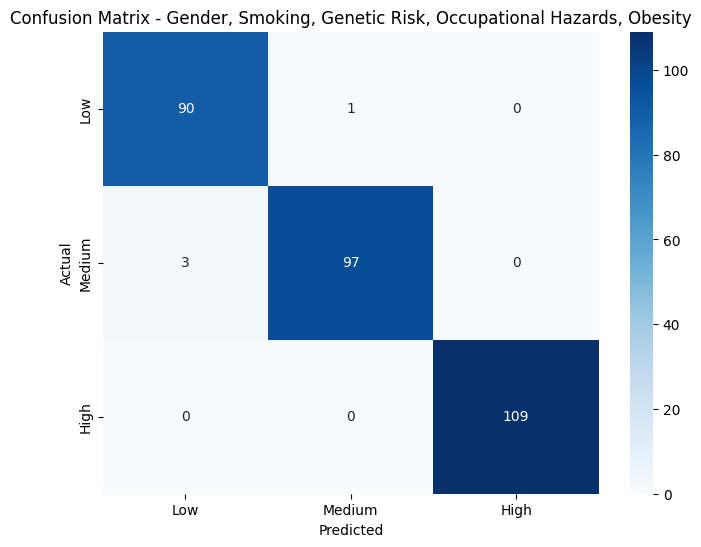

False Positives: 1
False Negatives: 3


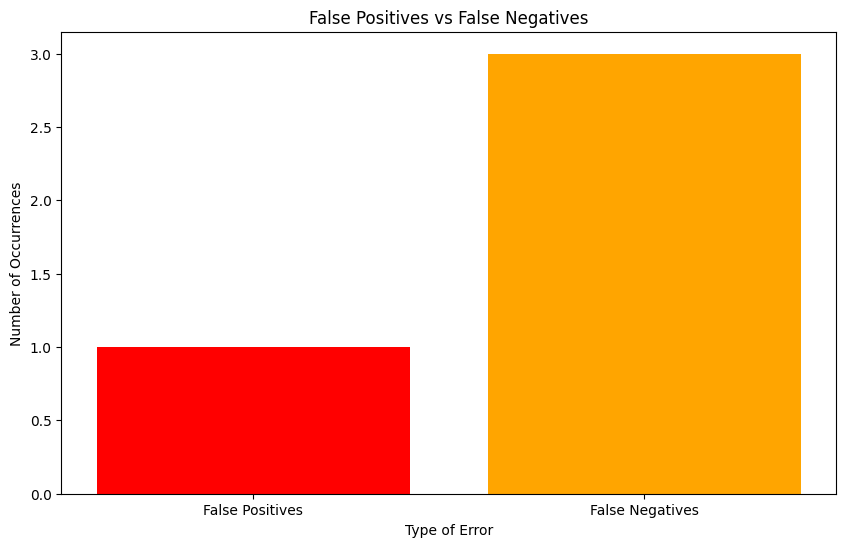

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset
df = pd.read_csv('cancer patient data sets.csv')

# Define features to use
features_to_use = ['Gender', 'Smoking', 'Genetic Risk', 'OccuPational Hazards', 'Obesity', 'Level']

# Subset the dataframe to include only the specified features
df = df[features_to_use]

# Drop rows with missing values
df = df.dropna()

# Map string labels to numerical values for 'Level' column
df['Level'] = df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Define features (X) and target variable (y)
X = df.drop(columns=['Level'])  # Features
y = df['Level']  # Target variable

# Stratified sampling to ensure proportional representation of classes in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division='warn'))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - Gender, Smoking, Genetic Risk, Occupational Hazards, Obesity')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract values from confusion matrix
TN, FP, FN, TP = conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[1, 1]

# Print false positives and false negatives
print("False Positives:", FP)
print("False Negatives:", FN)

# Plot false positives and false negatives
plt.figure(figsize=(10, 6))
plt.bar(['False Positives', 'False Negatives'], [FP, FN], color=['red', 'orange'])
plt.xlabel('Type of Error')
plt.ylabel('Number of Occurrences')
plt.title('False Positives vs False Negatives')
plt.show()

